# Generating sequences on the fly on submission

In [1]:
import numpy as np
import datetime
import time
import edd.experiments as edde
from edd.backend import IBMQBackend
from edd.circuit import IBMQDdCircuit
from edd.pulse import IBMQDdSchedule
from edd.data import IBMQData
import edd.workflow as wf

import matplotlib.pyplot as plt
from matplotlib import rc
rc("text", usetex=False)

# Submission Settings

In [2]:
# number of Haar random states to sample
N = 100
# label that describes the type of pulse delay experiment going on
d_label = "optimal"
# qubits on which to encode and to apply DD on
qubit = 2
encoding_qubits = qubit
dd_qubits = qubit

generic_settings = [N, d_label, encoding_qubits, dd_qubits]

backend_name = 'bogota'
# deprecated way to load in backend when my account info was hard-coded
#backend = IBMQBackend(f'ibmq_{backend_name}', "Nic")
# use this with your own info...
backend = IBMQBackend(name, hub, group, project, token) 
max_time = 4.65 # in micro seconds

def ns_time_to_dt(phys_time, dt):
    '''converts time from physical (ns) to dt normalized time'''
    return (phys_time * 1e-9) / dt

IBM Backend ibmq_bogota loaded at date/time: 2022-01-10 16:29:30


In [3]:
backend.backend.remaining_jobs_count()

20

## Create settings dictionary

In [4]:
# set max time
max_time = 4.65
# create a dictionary which maps sequence optimizied sequence settings for 5\mu s
opt_settings = {}
# ordering is [basis, symmetry, delay]
basis = "g_basis"
# add other sequences in order of performance
opt_settings["super_hahn"] = [basis, True, 2747]
opt_settings["purex"] = [basis, False, 5494]
opt_settings["xy4"] = [basis, False, 2704]
opt_settings["qdd_1_2"] = [basis, False, 1428]
opt_settings["qdd_1_4"] = [basis, False, 379]
opt_settings["rga32c"] = [basis, True, 102]
opt_settings["rga64c"] = [basis, False, 0]
opt_settings["ur20"] = [basis, True, 236]
opt_settings["cdd3"] = [basis, False, 93]

list_of_seq = list(opt_settings.keys())

## Create number of reps dictionary

In [5]:
rep_dict = {seq: None for seq in list_of_seq}
for seq in list_of_seq:
    basis, sym, delay = opt_settings[seq]
    sched = IBMQDdSchedule(backend, basis)
    if "uddx" in seq:
        seq_method = "add_uddx"
        ord_n = int(seq[4:])
        getattr(sched, seq_method)(ord_n, qubit, 1, delay, sym)
    elif "qdd" in seq:
        seq_method = "add_qdd"
        _, ord_n, ord_m = seq.split("_")
        ord_n = int(ord_n)
        ord_m = int(ord_m)
        getattr(sched, seq_method)(ord_n, ord_m, qubit, 1, delay, sym)
    elif "ur" in seq and "x" not in seq and "y" not in seq:
        seq_method = "add_ur"
        ord_n = int(seq[2:])
        getattr(sched, seq_method)(ord_n, qubit, 1, delay, sym)
    else:
        getattr(sched, f"add_{seq}")(qubit, 1, delay, sym)
    T = sched.get_phys_time() / 1000 
    max_reps = int(np.floor(max_time / T))
    T_diff = int(np.ceil(ns_time_to_dt((max_time - max_reps * T) * 1000, sched.dt)))
    rep_dict[seq] = (max_reps, T_diff)

In [6]:
print(rep_dict)

{'super_hahn': (1, 9618), 'purex': (1, 9618), 'xy4': (1, 9470), 'qdd_1_2': (1, 9795), 'qdd_1_4': (1, 10431), 'rga32c': (1, 7794), 'rga64c': (1, 9406), 'ur20': (1, 8286), 'cdd3': (1, 6974)}


In [7]:
wf.gen_haar_fds_on_fly_and_submit(backend, rep_dict, opt_settings, generic_settings, 10)

job idx being tried: 0 w/ seq super_hahn
avail jobs: 20
submitting job with idx: 0 w/ seq super_hahn


/Users/worknic/opt/anaconda3/envs/edd18Aug2021/lib/python3.9/site-packages/qiskit/compiler/assembler.py:436: RuntimeWarning: Dynamic rep rates are supported on this backend. 'rep_delay' will be used instead of 'rep_time'.
  warnings.warn(


job idx being tried: 1 w/ seq purex
avail jobs: 19
submitting job with idx: 1 w/ seq purex
job idx being tried: 2 w/ seq xy4
avail jobs: 18
submitting job with idx: 2 w/ seq xy4
job idx being tried: 3 w/ seq qdd_1_2
avail jobs: 17
submitting job with idx: 3 w/ seq qdd_1_2
job idx being tried: 4 w/ seq qdd_1_4
avail jobs: 17
submitting job with idx: 4 w/ seq qdd_1_4
job idx being tried: 5 w/ seq rga32c
avail jobs: 16
submitting job with idx: 5 w/ seq rga32c
job idx being tried: 6 w/ seq rga64c
avail jobs: 16
submitting job with idx: 6 w/ seq rga64c
job idx being tried: 7 w/ seq ur20
avail jobs: 15
submitting job with idx: 7 w/ seq ur20
job idx being tried: 8 w/ seq cdd3
avail jobs: 14
submitting job with idx: 8 w/ seq cdd3
job idx being tried: 9 w/ seq super_hahn
avail jobs: 14
submitting job with idx: 9 w/ seq super_hahn
job idx being tried: 10 w/ seq purex
avail jobs: 13
submitting job with idx: 10 w/ seq purex
job idx being tried: 11 w/ seq xy4
avail jobs: 13
submitting job with idx:

ibmqfactory.load_account:WARNING:2022-01-10 20:02:25,261: Credentials are already in use. The existing account in the session will be replaced.


Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-10 20:02:30
Data for job with idx 1 retrieved and will be saved.


ibmqfactory.load_account:WARNING:2022-01-10 20:02:37,012: Credentials are already in use. The existing account in the session will be replaced.


Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-10 20:02:42
Data for job with idx 2 retrieved and will be saved.


ibmqfactory.load_account:WARNING:2022-01-10 20:02:48,910: Credentials are already in use. The existing account in the session will be replaced.


Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-10 20:02:53
Data for job with idx 3 retrieved and will be saved.


ibmqfactory.load_account:WARNING:2022-01-10 20:02:59,129: Credentials are already in use. The existing account in the session will be replaced.


Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-10 20:03:02


ibmqfactory.load_account:WARNING:2022-01-10 20:03:08,819: Credentials are already in use. The existing account in the session will be replaced.


Data for job with idx 4 retrieved and will be saved.
Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-10 20:03:12
Data for job with idx 5 retrieved and will be saved.


ibmqfactory.load_account:WARNING:2022-01-10 20:03:18,989: Credentials are already in use. The existing account in the session will be replaced.


Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-10 20:03:22


ibmqfactory.load_account:WARNING:2022-01-10 20:03:28,118: Credentials are already in use. The existing account in the session will be replaced.


Data for job with idx 6 retrieved and will be saved.
Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-10 20:03:33


ibmqfactory.load_account:WARNING:2022-01-10 20:03:39,183: Credentials are already in use. The existing account in the session will be replaced.


Data for job with idx 7 retrieved and will be saved.
Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-10 20:03:43
Data for job with idx 8 retrieved and will be saved.


ibmqfactory.load_account:WARNING:2022-01-10 20:03:49,743: Credentials are already in use. The existing account in the session will be replaced.


Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-10 20:03:54
Data for job with idx 9 retrieved and will be saved.


ibmqfactory.load_account:WARNING:2022-01-10 20:04:00,180: Credentials are already in use. The existing account in the session will be replaced.


Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-10 20:04:04
Data for job with idx 10 retrieved and will be saved.


ibmqfactory.load_account:WARNING:2022-01-10 20:04:11,068: Credentials are already in use. The existing account in the session will be replaced.


Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-10 20:04:15
Data for job with idx 11 retrieved and will be saved.


ibmqfactory.load_account:WARNING:2022-01-10 20:04:21,874: Credentials are already in use. The existing account in the session will be replaced.


Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-10 20:04:26
Data for job with idx 12 retrieved and will be saved.


ibmqfactory.load_account:WARNING:2022-01-10 20:04:33,147: Credentials are already in use. The existing account in the session will be replaced.


Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-10 20:04:37


ibmqfactory.load_account:WARNING:2022-01-10 20:04:42,910: Credentials are already in use. The existing account in the session will be replaced.


Data for job with idx 13 retrieved and will be saved.
Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-10 20:04:46
Data for job with idx 14 retrieved and will be saved.


ibmqfactory.load_account:WARNING:2022-01-10 20:04:52,635: Credentials are already in use. The existing account in the session will be replaced.


Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-10 20:04:57
Data for job with idx 15 retrieved and will be saved.


ibmqfactory.load_account:WARNING:2022-01-10 20:05:15,632: Credentials are already in use. The existing account in the session will be replaced.


Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-10 20:05:20
Data for job with idx 16 retrieved and will be saved.


ibmqfactory.load_account:WARNING:2022-01-10 20:05:27,146: Credentials are already in use. The existing account in the session will be replaced.


Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-10 20:05:31


ibmqfactory.load_account:WARNING:2022-01-10 20:05:42,130: Credentials are already in use. The existing account in the session will be replaced.


Data for job with idx 17 retrieved and will be saved.
Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-10 20:05:46
Data for job with idx 18 retrieved and will be saved.


ibmqfactory.load_account:WARNING:2022-01-10 20:05:53,795: Credentials are already in use. The existing account in the session will be replaced.


Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-10 20:05:58
Data for job with idx 19 retrieved and will be saved.


ibmqfactory.load_account:WARNING:2022-01-10 20:06:04,721: Credentials are already in use. The existing account in the session will be replaced.


Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-10 20:06:09
avail jobs: 2
submitting job with idx: 38 w/ seq xy4
job idx being tried: 39 w/ seq qdd_1_2
avail jobs: 1
submitting job with idx: 39 w/ seq qdd_1_2
job idx being tried: 40 w/ seq qdd_1_4
avail jobs: 1
submitting job with idx: 40 w/ seq qdd_1_4
job idx being tried: 41 w/ seq rga32c
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
Data for job with idx 20 retrieved and will be saved.


ibmqfactory.load_account:WARNING:2022-01-10 20:32:39,368: Credentials are already in use. The existing account in the session will be replaced.


Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-10 20:32:45
Data for job with idx 21 retrieved and will be saved.


ibmqfactory.load_account:WARNING:2022-01-10 20:32:51,840: Credentials are already in use. The existing account in the session will be replaced.


Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-10 20:32:56
avail jobs: 1
submitting job with idx: 41 w/ seq rga32c
job idx being tried: 42 w/ seq rga64c
avail jobs: 1
submitting job with idx: 42 w/ seq rga64c
job idx being tried: 43 w/ seq ur20
avail jobs: 1
submitting job with idx: 43 w/ seq ur20
job idx being tried: 44 w/ seq cdd3
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
Data for job with idx 22 retrieved and will be saved.


ibmqfactory.load_account:WARNING:2022-01-10 20:59:36,016: Credentials are already in use. The existing account in the session will be replaced.


Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-10 20:59:41
Data for job with idx 23 retrieved and will be saved.


ibmqfactory.load_account:WARNING:2022-01-10 20:59:48,029: Credentials are already in use. The existing account in the session will be replaced.


Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-10 20:59:52
Data for job with idx 24 retrieved and will be saved.


ibmqfactory.load_account:WARNING:2022-01-10 20:59:58,522: Credentials are already in use. The existing account in the session will be replaced.


Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-10 21:00:04
avail jobs: 1
submitting job with idx: 44 w/ seq cdd3
job idx being tried: 45 w/ seq super_hahn
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
Data for job with idx 25 retrieved and will be saved.


ibmqfactory.load_account:WARNING:2022-01-10 21:16:30,874: Credentials are already in use. The existing account in the session will be replaced.


Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-10 21:16:36
avail jobs: 1
submitting job with idx: 45 w/ seq super_hahn
job idx being tried: 46 w/ seq purex
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
Data for job with idx 26 retrieved and will be saved.


ibmqfactory.load_account:WARNING:2022-01-10 21:33:04,189: Credentials are already in use. The existing account in the session will be replaced.


Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-10 21:33:08
avail jobs: 1
submitting job with idx: 46 w/ seq purex
job idx being tried: 47 w/ seq xy4
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
Data for job with idx 27 retrieved and will be saved.


ibmqfactory.load_account:WARNING:2022-01-10 21:48:48,143: Credentials are already in use. The existing account in the session will be replaced.


Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-10 21:48:52
avail jobs: 1
submitting job with idx: 47 w/ seq xy4
job idx being tried: 48 w/ seq qdd_1_2
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
Data for job with idx 28 retrieved and will be saved.


ibmqfactory.load_account:WARNING:2022-01-10 22:45:14,780: Credentials are already in use. The existing account in the session will be replaced.


Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-10 22:45:20
avail jobs: 1
submitting job with idx: 48 w/ seq qdd_1_2
job idx being tried: 49 w/ seq qdd_1_4
avail jobs: 1
submitting job with idx: 49 w/ seq qdd_1_4
job idx being tried: 50 w/ seq rga32c
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
Data for job with idx 29 retrieved and will be saved.


ibmqfactory.load_account:WARNING:2022-01-10 23:06:24,610: Credentials are already in use. The existing account in the session will be replaced.


Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-10 23:06:29
Data for job with idx 30 retrieved and will be saved.


ibmqfactory.load_account:WARNING:2022-01-10 23:06:36,627: Credentials are already in use. The existing account in the session will be replaced.


Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-10 23:06:41
avail jobs: 1
submitting job with idx: 50 w/ seq rga32c
job idx being tried: 51 w/ seq rga64c
avail jobs: 1
submitting job with idx: 51 w/ seq rga64c
job idx being tried: 52 w/ seq ur20
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
Data for job with idx 31 retrieved and will be saved.


ibmqfactory.load_account:WARNING:2022-01-10 23:29:04,316: Credentials are already in use. The existing account in the session will be replaced.


Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-10 23:29:10
Data for job with idx 32 retrieved and will be saved.


ibmqfactory.load_account:WARNING:2022-01-10 23:29:17,133: Credentials are already in use. The existing account in the session will be replaced.


Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-10 23:29:21
avail jobs: 1
submitting job with idx: 52 w/ seq ur20
job idx being tried: 53 w/ seq cdd3
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
Data for job with idx 33 retrieved and will be saved.


ibmqfactory.load_account:WARNING:2022-01-10 23:45:54,486: Credentials are already in use. The existing account in the session will be replaced.


Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-10 23:46:00
avail jobs: 1
submitting job with idx: 53 w/ seq cdd3
job idx being tried: 54 w/ seq super_hahn
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
Data for job with idx 34 retrieved and will be saved.


ibmqfactory.load_account:WARNING:2022-01-11 00:02:04,143: Credentials are already in use. The existing account in the session will be replaced.


Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-11 00:02:09
avail jobs: 1
submitting job with idx: 54 w/ seq super_hahn
job idx being tried: 55 w/ seq purex
avail jobs: 1
submitting job with idx: 55 w/ seq purex
job idx being tried: 56 w/ seq xy4
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
Data for job with idx 35 retrieved and will be saved.


ibmqfactory.load_account:WARNING:2022-01-11 00:22:54,430: Credentials are already in use. The existing account in the session will be replaced.


Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-11 00:22:59


ibmqfactory.load_account:WARNING:2022-01-11 00:23:05,842: Credentials are already in use. The existing account in the session will be replaced.


Data for job with idx 36 retrieved and will be saved.
Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-11 00:23:10
avail jobs: 1
submitting job with idx: 56 w/ seq xy4
job idx being tried: 57 w/ seq qdd_1_2
avail jobs: 1
submitting job with idx: 57 w/ seq qdd_1_2
job idx being tried: 58 w/ seq qdd_1_4
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.


ibmqfactory.load_account:WARNING:2022-01-11 00:44:13,917: Credentials are already in use. The existing account in the session will be replaced.


Data for job with idx 37 retrieved and will be saved.
Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-11 00:44:18


ibmqfactory.load_account:WARNING:2022-01-11 00:44:24,941: Credentials are already in use. The existing account in the session will be replaced.


Data for job with idx 38 retrieved and will be saved.
Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-11 00:44:29
avail jobs: 1
submitting job with idx: 58 w/ seq qdd_1_4
job idx being tried: 59 w/ seq rga32c
avail jobs: 1
submitting job with idx: 59 w/ seq rga32c
job with idx: 59 failed on first try w/ seq rga32c
job idx being tried: 60 w/ seq rga64c
avail jobs: 1
submitting job with idx: 60 w/ seq rga64c
job with idx: 60 failed on first try w/ seq rga64c
job idx being tried: 61 w/ seq ur20
avail jobs: 1
submitting job with idx: 61 w/ seq ur20
job with idx: 61 failed on first try w/ seq ur20
job idx being tried: 62 w/ seq cdd3


KeyboardInterrupt: 

## DO same thing with min delay

In [10]:
# number of Haar random states to sample
N = 100
# label that describes the type of pulse delay experiment going on
d_label = "min"
# qubits on which to encode and to apply DD on
qubit = 2
encoding_qubits = qubit
dd_qubits = qubit

generic_settings = [N, d_label, encoding_qubits, dd_qubits]

In [11]:
# set max time
max_time = 4.65
# create a dictionary which maps sequence optimizied sequence settings for 5\mu s
min_settings = {}
# ordering is [basis, symmetry, delay]
basis = "g_basis"
# add other sequences in order of performance
min_settings["super_hahn"] = [basis, False, 0]
min_settings["purex"] = [basis, False, 0]
min_settings["xy4"] = [basis, False, 0]
min_settings["qdd_1_2"] = [basis, False, 0]
min_settings["qdd_1_4"] = [basis, False, 0]
min_settings["rga32c"] = [basis, False, 0]
min_settings["rga64c"] = [basis, False, 0]
min_settings["ur20"] = [basis, False, 0]
min_settings["cdd3"] = [basis, False, 0]

list_of_seq = list(min_settings.keys())

## Create number of reps dictionary

In [12]:
rep_dict = {seq: None for seq in list_of_seq}
for seq in list_of_seq:
    basis, sym, delay = min_settings[seq]
    sched = IBMQDdSchedule(backend, basis)
    if "uddx" in seq:
        seq_method = "add_uddx"
        ord_n = int(seq[4:])
        getattr(sched, seq_method)(ord_n, qubit, 1, delay, sym)
    elif "qdd" in seq:
        seq_method = "add_qdd"
        _, ord_n, ord_m = seq.split("_")
        ord_n = int(ord_n)
        ord_m = int(ord_m)
        getattr(sched, seq_method)(ord_n, ord_m, qubit, 1, delay, sym)
    elif "ur" in seq and "x" not in seq and "y" not in seq:
        seq_method = "add_ur"
        ord_n = int(seq[2:])
        getattr(sched, seq_method)(ord_n, qubit, 1, delay, sym)
    else:
        getattr(sched, f"add_{seq}")(qubit, 1, delay, sym)
    T = sched.get_phys_time() / 1000 
    max_reps = int(np.floor(max_time / T))
    T_diff = int(np.ceil(ns_time_to_dt((max_time - max_reps * T) * 1000, sched.dt)))
    rep_dict[seq] = (max_reps, T_diff)

In [13]:
print(rep_dict)

{'super_hahn': (65, 126), 'purex': (65, 126), 'xy4': (32, 446), 'qdd_1_2': (8, 422), 'qdd_1_4': (3, 811), 'rga32c': (3, 1726), 'rga64c': (1, 9406), 'ur20': (6, 1726), 'cdd3': (2, 4926)}


In [14]:
wf.gen_haar_fds_on_fly_and_submit(backend, rep_dict, min_settings, generic_settings, 10)

job idx being tried: 0 w/ seq super_hahn
avail jobs: 20
submitting job with idx: 0 w/ seq super_hahn
job idx being tried: 1 w/ seq purex
avail jobs: 19
submitting job with idx: 1 w/ seq purex
job idx being tried: 2 w/ seq xy4
avail jobs: 18
submitting job with idx: 2 w/ seq xy4
job idx being tried: 3 w/ seq qdd_1_2
avail jobs: 17
submitting job with idx: 3 w/ seq qdd_1_2
job idx being tried: 4 w/ seq qdd_1_4
avail jobs: 16
submitting job with idx: 4 w/ seq qdd_1_4
job idx being tried: 5 w/ seq rga32c
avail jobs: 16
submitting job with idx: 5 w/ seq rga32c
job idx being tried: 6 w/ seq rga64c
avail jobs: 15
submitting job with idx: 6 w/ seq rga64c
job idx being tried: 7 w/ seq ur20
avail jobs: 14
submitting job with idx: 7 w/ seq ur20
job idx being tried: 8 w/ seq cdd3
avail jobs: 13
submitting job with idx: 8 w/ seq cdd3
job idx being tried: 9 w/ seq super_hahn
avail jobs: 12
submitting job with idx: 9 w/ seq super_hahn
job idx being tried: 10 w/ seq purex
avail jobs: 11
submitting job

ibmqfactory.load_account:WARNING:2022-01-11 03:09:55,820: Credentials are already in use. The existing account in the session will be replaced.


Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-11 03:10:01
Data for job with idx 1 retrieved and will be saved.


ibmqfactory.load_account:WARNING:2022-01-11 03:10:07,180: Credentials are already in use. The existing account in the session will be replaced.


Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-11 03:10:12
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
Data for job with idx 2 retrieved and will be saved.


ibmqfactory.load_account:WARNING:2022-01-11 03:50:47,852: Credentials are already in use. The existing account in the session will be replaced.


Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-11 03:50:52
avail jobs: 1
submitting job with idx: 22 w/ seq qdd_1_4
job idx being tried: 23 w/ seq rga32c
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
Data for job with idx 3 retrieved and will be saved.


ibmqfactory.load_account:WARNING:2022-01-11 04:46:58,419: Credentials are already in use. The existing account in the session will be replaced.


Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-11 04:47:04
avail jobs: 1
submitting job with idx: 23 w/ seq rga32c
job idx being tried: 24 w/ seq rga64c
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
Data for job with idx 4 retrieved and will be saved.


ibmqfactory.load_account:WARNING:2022-01-11 05:43:04,081: Credentials are already in use. The existing account in the session will be replaced.


Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-11 05:43:09
avail jobs: 1
submitting job with idx: 24 w/ seq rga64c
job idx being tried: 25 w/ seq ur20
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
Data for job with idx 5 retrieved and will be saved.


ibmqfactory.load_account:WARNING:2022-01-11 07:01:22,928: Credentials are already in use. The existing account in the session will be replaced.


Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-11 07:01:32
avail jobs: 1
submitting job with idx: 25 w/ seq ur20
job idx being tried: 26 w/ seq cdd3
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
avail jobs

ibmqfactory.load_account:WARNING:2022-01-11 08:50:02,169: Credentials are already in use. The existing account in the session will be replaced.


Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-11 08:50:11
avail jobs: 1
submitting job with idx: 26 w/ seq cdd3
job idx being tried: 27 w/ seq super_hahn
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
Data for job with idx 7 retrieved and will be saved.


ibmqfactory.load_account:WARNING:2022-01-11 09:29:31,595: Credentials are already in use. The existing account in the session will be replaced.


Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-11 09:29:36
avail jobs: 1
submitting job with idx: 27 w/ seq super_hahn
job idx being tried: 28 w/ seq purex
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
Data for job with idx 8 retrieved and will be saved.


ibmqfactory.load_account:WARNING:2022-01-11 10:06:46,873: Credentials are already in use. The existing account in the session will be replaced.


Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-11 10:06:52
avail jobs: 1
submitting job with idx: 28 w/ seq purex
job idx being tried: 29 w/ seq xy4
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
Data for job with idx 9 retrieved and will be saved.


ibmqfactory.load_account:WARNING:2022-01-11 10:54:42,243: Credentials are already in use. The existing account in the session will be replaced.


Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-11 10:54:50
avail jobs: 1
submitting job with idx: 29 w/ seq xy4
job idx being tried: 30 w/ seq qdd_1_2
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
Data for job with idx 10 retrieved and will be saved.


ibmqfactory.load_account:WARNING:2022-01-11 11:22:39,572: Credentials are already in use. The existing account in the session will be replaced.


Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-11 11:22:45
avail jobs: 1
submitting job with idx: 30 w/ seq qdd_1_2
job idx being tried: 31 w/ seq qdd_1_4
avail jobs: 1
submitting job with idx: 31 w/ seq qdd_1_4
job idx being tried: 32 w/ seq rga32c
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
Data for job with idx 11 retrieved and will be saved.


ibmqfactory.load_account:WARNING:2022-01-11 11:46:31,377: Credentials are already in use. The existing account in the session will be replaced.


Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-11 11:46:36
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
Data for job with idx 12 retrieved and will be saved.


ibmqfactory.load_account:WARNING:2022-01-11 12:27:36,546: Credentials are already in use. The existing account in the session will be replaced.


Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-11 12:27:42
avail jobs: 1
submitting job with idx: 32 w/ seq rga32c
job idx being tried: 33 w/ seq rga64c
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
Data for job with idx 13 retrieved and will be saved.


ibmqfactory.load_account:WARNING:2022-01-11 13:05:42,655: Credentials are already in use. The existing account in the session will be replaced.


Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-11 13:05:48
avail jobs: 1
submitting job with idx: 33 w/ seq rga64c
job idx being tried: 34 w/ seq ur20
avail jobs: 1
submitting job with idx: 34 w/ seq ur20
job idx being tried: 35 w/ seq cdd3
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
Data for job with idx 14 retrieved and will be saved.


ibmqfactory.load_account:WARNING:2022-01-11 13:28:18,978: Credentials are already in use. The existing account in the session will be replaced.


Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-11 13:28:24
Data for job with idx 15 retrieved and will be saved.


ibmqfactory.load_account:WARNING:2022-01-11 13:28:31,078: Credentials are already in use. The existing account in the session will be replaced.


Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-11 13:28:35
avail jobs: 1
submitting job with idx: 35 w/ seq cdd3
job idx being tried: 36 w/ seq super_hahn
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
Data for job with idx 16 retrieved and will be saved.


ibmqfactory.load_account:WARNING:2022-01-11 13:45:52,199: Credentials are already in use. The existing account in the session will be replaced.


Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-11 13:45:57
avail jobs: 1
submitting job with idx: 36 w/ seq super_hahn
job idx being tried: 37 w/ seq purex
avail jobs: 1
submitting job with idx: 37 w/ seq purex
job idx being tried: 38 w/ seq xy4
avail jobs: 1
submitting job with idx: 38 w/ seq xy4
job idx being tried: 39 w/ seq qdd_1_2
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
Data for job with idx 17 retrieved and will be saved.


ibmqfactory.load_account:WARNING:2022-01-11 14:13:37,895: Credentials are already in use. The existing account in the session will be replaced.


Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-11 14:13:44
Data for job with idx 18 retrieved and will be saved.


ibmqfactory.load_account:WARNING:2022-01-11 14:13:50,793: Credentials are already in use. The existing account in the session will be replaced.


Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-11 14:13:55
Data for job with idx 19 retrieved and will be saved.


ibmqfactory.load_account:WARNING:2022-01-11 14:14:02,653: Credentials are already in use. The existing account in the session will be replaced.


Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-11 14:14:07
avail jobs: 1
submitting job with idx: 39 w/ seq qdd_1_2
job idx being tried: 40 w/ seq qdd_1_4
avail jobs: 1
submitting job with idx: 40 w/ seq qdd_1_4
job idx being tried: 41 w/ seq rga32c
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
Data for job with idx 20 retrieved and will be saved.


ibmqfactory.load_account:WARNING:2022-01-11 14:36:20,599: Credentials are already in use. The existing account in the session will be replaced.


Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-11 14:36:25
Data for job with idx 21 retrieved and will be saved.


ibmqfactory.load_account:WARNING:2022-01-11 14:36:31,973: Credentials are already in use. The existing account in the session will be replaced.


Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-11 14:36:36
avail jobs: 1
submitting job with idx: 41 w/ seq rga32c
job idx being tried: 42 w/ seq rga64c
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
Data for job with idx 22 retrieved and will be saved.


ibmqfactory.load_account:WARNING:2022-01-11 15:02:41,963: Credentials are already in use. The existing account in the session will be replaced.


Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-11 15:02:47
avail jobs: 1
submitting job with idx: 42 w/ seq rga64c
job idx being tried: 43 w/ seq ur20
avail jobs: 1
submitting job with idx: 43 w/ seq ur20
job idx being tried: 44 w/ seq cdd3
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
Data for job with idx 23 retrieved and will be saved.


ibmqfactory.load_account:WARNING:2022-01-11 15:25:14,260: Credentials are already in use. The existing account in the session will be replaced.


Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-11 15:25:19
Data for job with idx 24 retrieved and will be saved.


ibmqfactory.load_account:WARNING:2022-01-11 15:25:25,437: Credentials are already in use. The existing account in the session will be replaced.


Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-11 15:25:29
avail jobs: 1
submitting job with idx: 44 w/ seq cdd3
job idx being tried: 45 w/ seq super_hahn
avail jobs: 1
submitting job with idx: 45 w/ seq super_hahn
job idx being tried: 46 w/ seq purex
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
Data for job with idx 25 retrieved and will be saved.


ibmqfactory.load_account:WARNING:2022-01-11 15:46:58,604: Credentials are already in use. The existing account in the session will be replaced.


Old backend ibmq_bogota switched to ibmq_bogota at date/time 2022-01-11 15:47:04
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
avail jobs: 0
No availible queue slots for this account. Going to wait 600s and try again.
avail job

KeyboardInterrupt: 

## Cancelling a job (just in case)

In [15]:
backend.backend.remaining_jobs_count()

0

In [16]:
for j in range(20):
    backend.backend.active_jobs()[0].cancel()

In [ ]:
seq = "uddx10"
desc, scheds = edde.pulse.haar_fid_decay_dd(N, seq, sym, rep_dict[seq][0], rep_dict[seq][1], delay, d_label, backend, basis, encoding_qubits, dd_qubits)

In [16]:
job = backend.submit_job(scheds, "test")

In [20]:
job.status()

<JobStatus.DONE: 'job has successfully run'>

In [21]:
result = job.result()

In [25]:
fids = [result.get_counts()[x]['0'] / 8192 for x in range(75)]
np.mean(fids), 2 * np.std(fids)

(0.9161751302083333, 0.025075796725005005)

In [31]:
def compute_roll_avg(fids):
    """
    Computes rolling average
    """
    roll_avgs = []
    current_vals = [fids[0]]
    for j in range(74):
        roll_avgs.append(np.mean(current_vals))
        current_vals.append(fids[j + 1])
        
    return roll_avgs

In [44]:
roll_avgs = compute_roll_avg(fids)

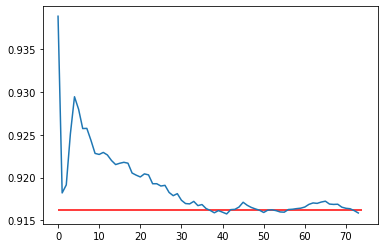

In [51]:
plt.plot(roll_avgs)
plt.hlines(np.mean(fids), 0, 74, colors="red")

(array([ 7.,  6., 11.,  9., 13., 12.,  9.,  2.,  3.,  3.]),
 array([0.8927002 , 0.89810791, 0.90351563, 0.90892334, 0.91433105,
        0.91973877, 0.92514648, 0.9305542 , 0.93596191, 0.94136963,
        0.94677734]),
 <BarContainer object of 10 artists>)

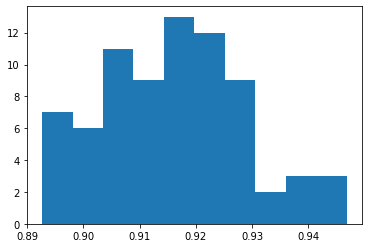

In [46]:
plt.hist(fids)

In [9]:
# set max time
max_time = 5
# create a dictionary which maps sequence optimizied sequence settings for 5\mu s
opt_settings = {}
# ordering is [basis, symmetry, delay]
opt_settings["free"] = ["g_basis", False, 0]

list_of_seq = ["free"]

## Create number of reps dictionary

In [10]:
rep_dict = {seq: None for seq in list_of_seq}
for seq in list_of_seq:
    basis, sym, delay = opt_settings[seq]
    sched = IBMQDdSchedule(backend, basis)
    if "uddx" in seq:
        seq_method = "add_uddx"
        ord_n = int(seq[4:])
        getattr(sched, seq_method)(ord_n, qubit, 1, delay, sym)
    elif "qdd" in seq:
        seq_method = "add_qdd"
        _, ord_n, ord_m = seq.split("_")
        ord_n = int(ord_n)
        ord_m = int(ord_m)
        getattr(sched, seq_method)(ord_n, ord_m, qubit, 1, delay, sym)
    elif "ur" in seq and "x" not in seq and "y" not in seq:
        seq_method = "add_ur"
        ord_n = int(seq[2:])
        getattr(sched, seq_method)(ord_n, qubit, 1, delay, sym)
    else:
        getattr(sched, f"add_{seq}")(qubit, 1, delay, sym)
    T = sched.get_phys_time() / 1000 
    max_reps = int(np.floor(max_time / T))
    T_diff = int(np.ceil(ns_time_to_dt((max_time - max_reps * T) * 1000, sched.dt)))
    rep_dict[seq] = (max_reps, T_diff)

In [11]:
rep_dict

{'free': (70, 100)}

In [13]:
wf.gen_haar_fds_on_fly_and_submit(backend, rep_dict, opt_settings, generic_settings, 1)

job idx being tried: 0 w/ seq free
avail jobs: 20
submitting job with idx: 0 w/ seq free
All jobs submitted. Awaiting retrieval. (This message is sent every 600s.)
All jobs submitted. Awaiting retrieval. (This message is sent every 600s.)
All jobs submitted. Awaiting retrieval. (This message is sent every 600s.)
All jobs submitted. Awaiting retrieval. (This message is sent every 600s.)
All jobs submitted. Awaiting retrieval. (This message is sent every 600s.)
All jobs submitted. Awaiting retrieval. (This message is sent every 600s.)
All jobs submitted. Awaiting retrieval. (This message is sent every 600s.)
Data for job with idx 0 retrieved and will be saved.


ibmqfactory.load_account:WARNING:2021-11-12 00:51:40,699: Credentials are already in use. The existing account in the session will be replaced.


Old backend ibmq_armonk switched to ibmq_armonk at date/time 2021-11-12 00:51:46


([Result(backend_name='ibmq_armonk', backend_version='2.4.22', qobj_id='job_0', job_id='618e1d05cc669a7098d2e27d', success=True, results=[ExperimentResult(shots=20000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 16396, '0x1': 3604}), header=QobjExperimentHeader(memory_slots=1, metadata={}, name='pulse_g_basis_haar_100_dtype_min_fid_decay_free_sym_False_encodeqs_0_ddqs_0_reps_70_delay_0dt_T_5000.000000000001ns_pode_53')), ExperimentResult(shots=20000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 16164, '0x1': 3836}), header=QobjExperimentHeader(memory_slots=1, metadata={}, name='pulse_g_basis_haar_100_dtype_min_fid_decay_free_sym_False_encodeqs_0_ddqs_0_reps_70_delay_0dt_T_5000.000000000001ns_pode_91')), ExperimentResult(shots=20000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 16829, '0x1': 3171}), header=QobjExperimentHeader(memory_slots=1, metadata={}, name='pulse_g_basis_haar_100_dtype_min_fid_decay_free_sym_Fa